In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

## Набор данных

In [2]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

### Housing Values in Suburbs of Boston
The medv variable is the target variable.

Data description
The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

* crim - per capita crime rate by town.
* zn - proportion of residential land zoned for lots over 25,000 sq.ft.
* indus - proportion of non-retail business acres per town.
* chas - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* nox - nitrogen oxides concentration (parts per 10 million).
* rm - average number of rooms per dwelling.
* age - proportion of owner-occupied units built prior to 1940.
* dis - weighted mean of distances to five Boston employment centres.
* rad - index of accessibility to radial highways.
* tax - full-value property-tax rate per 10,000 USD.
* ptratio - pupil-teacher ratio by town.
* black - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
* lstat - lower status of the population (percent).
* medv - median value of owner-occupied homes in 1000 USD.

Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

https://www.kaggle.com/c/boston-housing

In [3]:
print(train_data.shape, test_data.shape)

(404, 13) (102, 13)


In [4]:
print(train_targets[:5])
print(train_data[:5])

[15.2 42.3 50.  21.1 17.7]
[[1.23247e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 6.14200e+00
  9.17000e+01 3.97690e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 0.00000e+00 4.15000e-01 7.61000e+00
  1.57000e+01 6.27000e+00 2.00000e+00 3.48000e+02 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
  1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.75520e+02
  3.26000e+00]
 [3.96100e-02 0.00000e+00 5.19000e+00 0.00000e+00 5.15000e-01 6.03700e+00
  3.45000e+01 5.98530e+00 5.00000e+00 2.24000e+02 2.02000e+01 3.96900e+02
  8.01000e+00]
 [3.69311e+00 0.00000e+00 1.81000e+01 0.00000e+00 7.13000e-01 6.37600e+00
  8.84000e+01 2.56710e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.91430e+02
  1.46500e+01]]


## подготовка данных

In [6]:
# вычисление среднего значения по всем обучающим данным
mean = train_data.mean(axis=0)
# вычитаем среднее значение
train_data -= mean
# вычисляем стандартное отклонение
std = train_data.std(axis=0)
# и делим на него
train_data /= std

# для подготовки тестовых даных используем среднее знач-е и станд.откл-е, вычисленное на обучающих данных
test_data -= mean
test_data /= std

In [7]:
train_data[:5]

array([[-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
        -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
         1.14850044,  0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, -0.25683275, -1.21518188,
         1.89434613, -1.91036058,  1.24758524, -0.85646254, -0.34843254,
        -1.71818909,  0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , -0.25683275,  0.62864202,
        -1.82968811,  1.11048828, -1.18743907,  1.67588577,  1.5652875 ,
         0.78447637,  0.22061726, -1.30850006],
       [-0.40149354, -0.48361547, -0.86940196, -0.25683275, -0.3615597 ,
        -0.3245576 , -1.23667187,  1.10717989, -0.51114231, -1.094663  ,
         0.78447637,  0.44807713, -0.65292624],
       [-0.0056343 , -0.48361547,  1.0283258 , -0.25683275,  1.32861221,
         0.15364225,  0.69480801, -0.57857203,  1.67588577,  1.5652875 ,
         0.78447637,  0.3898823 ,  0.26349695]])

## Построение сети

In [8]:
from keras import models
from keras import layers

# ф-ция построения модели
def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    # для последнего слоя не указана ф-ция активации, чтобы сеть могла выдавать вещественные значения
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', 
                  loss='mse',       # ф-ция потерь - среднеквадратичная ошибка
                  metrics=['mae'])  # метрика - средняя абсолютная ошибка
    return model

In [14]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


## Валидация модели с помощью механизма перекрёстной проверки по k блокам

In [9]:
import numpy as np

k = 4 # кол-во блоков
num_val_samples = len(train_data) // k   # кол-во примеров (строк) в валидационной выборке
num_epochs = 100 # кол-во эпох обучения
all_scores = []  # массив для сохранения итоговых оценок
# цикл по кол-ву блоков
for i in range(k):
    print('processing fold #', i)
    # выделение валидационной выборки
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # берём оставшийся кусок данных для обучения
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # вызываем нашу ф-цию построения модели
    model = build_model()
    # выполняем обучение, подавляем промежуточный вывод отладочной информации (verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # производим оценку модели
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    # сохраняем оценки в массив
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [10]:
all_scores

[2.0856642557842897, 2.141386331898151, 2.9507107781891775, 2.402584097172954]

In [11]:
np.mean(all_scores)

2.395086365761143

In [12]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [13]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # в процессе обучения сохраняем промежуточные результаты оценок модели в объект history
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    # сохраняем значение MAE для построения графика
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [15]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

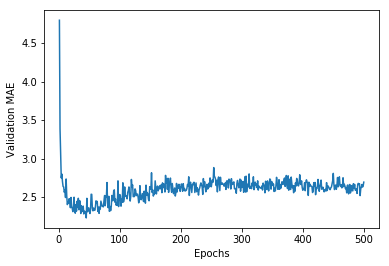

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

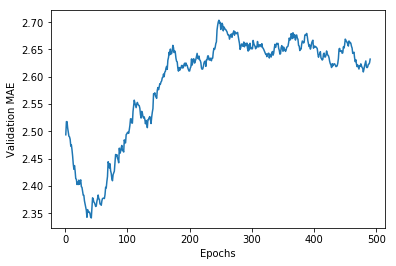

In [17]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [18]:
min(average_mae_history)

2.2286668461148103

In [20]:
average_mae_history[ 40:60 ]

[2.2801003881020123,
 2.316521122904107,
 2.310225457248121,
 2.3001141170463937,
 2.2286668461148103,
 2.48332417837464,
 2.3090792481261904,
 2.3474574561166293,
 2.359967392269928,
 2.3163574762863686,
 2.2853697632799053,
 2.332261550544512,
 2.5360842471075533,
 2.5345569376898283,
 2.3578279396094897,
 2.320322532464962,
 2.3571794770731787,
 2.3382775830750417,
 2.3273386176269835,
 2.372219937862736]

In [21]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=44, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 704us/step


In [22]:
test_mae_score

2.815280474868475

In [25]:
py = model.predict(test_data)
test_targets - py

array([[ -0.62628107,  10.97371893,  11.17371893, ...,  42.17371893,
         18.87371893,  17.17371893],
       [-11.38126831,   0.21873169,   0.41873169, ...,  31.41873169,
          8.11873169,   6.41873169],
       [-13.98327713,  -2.38327713,  -2.18327713, ...,  28.81672287,
          5.51672287,   3.81672287],
       ...,
       [-40.45558624, -28.85558624, -28.65558624, ...,   2.34441376,
        -20.95558624, -22.65558624],
       [-23.58656006, -11.98656006, -11.78656006, ...,  19.21343994,
         -4.08656006,  -5.78656006],
       [-13.23835258,  -1.63835258,  -1.43835258, ...,  29.56164742,
          6.26164742,   4.56164742]])